### Process to adjust bright field images to timed video based on light sheet imaging time stamps. by Hikaru Shishido ver3.00
 明視野画像をライトシート顕微鏡の撮像タイミングに基づいて、調整する処理  

#### How to use 
- Change Folder path
- Put the following four files in the Folder specified above.
- ① 3Dtimestamp.csv, ② log.csv, ③ parameter.txt, ④ rec.avi

#### 使用方法 
- Folder pathを変更
- 上記で指定のFolderに以下4つのファイルを入れた状態にする
- ① 3Dtimestamp.csv, ② log.csv, ③ parameter.txt, ④ rec.avi

In [1]:
folder_paths = [
    # r"E:\_C.elegans\FigX\ana\20240507-192521tdTomato-26mW-1",
    # r"E:\_C.elegans\FigX\ana\20240507-202252tdTomato-19mW-2",
    # r"E:\_C.elegans\FigX\ana\20240507-203354tdTomato-19mW-5",
    r"E:\_C.elegans\FigX\ana\20240508-174849tdTomato-12mW-3",
    r"E:\_C.elegans\FigX\ana\20240508-185610tdTomato-10mW-1good",
    r"E:\_C.elegans\FigX\ana\20240508-200229tdTomato-10mW-4",
    r"E:\_C.elegans\FigX\ana\20240516-203245tdTomato-7mW-3",
]

#### 一個体ずつ

E:/_C.elegans/FigX/ana/20240508-174849tdTomato-12mW-3


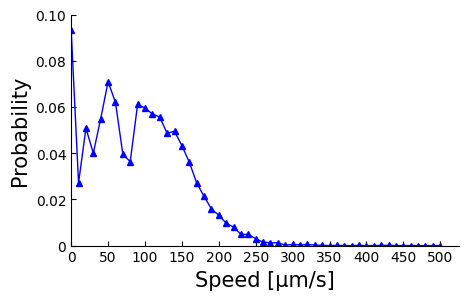

E:/_C.elegans/FigX/ana/20240508-185610tdTomato-10mW-1good


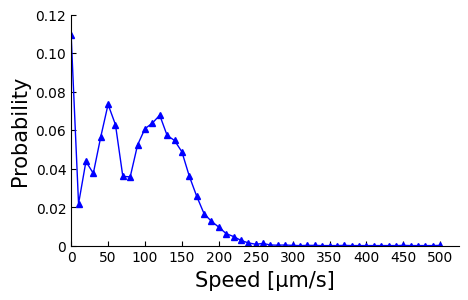

E:/_C.elegans/FigX/ana/20240508-200229tdTomato-10mW-4


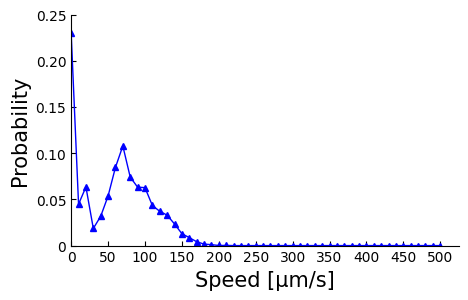

E:/_C.elegans/FigX/ana/20240516-203245tdTomato-7mW-3


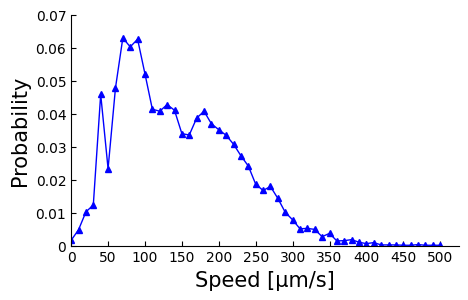

All process is finished


In [4]:
import winsound
import matplotlib.pyplot as plt
import pandas as pd


for h in range(len(folder_paths)):
    folder_paths[h] = folder_paths[h].replace("\\", "/")
    print(folder_paths[h])

    # bright image csv file's path
    file_path = folder_paths[h] + "/" + "log matching 50 fps.csv"

    df = pd.read_csv(file_path, encoding='shift_jis')

    # velocity 列の範囲ごとのカウント数を計算
    bins = list(range(-5, 510, 10)) #+ [float('inf')]  # -5から505までの10刻みとそれ以上
    labels = [f'{i+5}' for i in range(-5, 500, 10)] #+ ['500+']  # ラベルの設定

    df['velocity_bin'] = pd.cut(df['velocity[μm/s]'], bins=bins, labels=labels, right=False)

    # 範囲ごとのカウント数を計算
    counts = df['velocity_bin'].value_counts().sort_index()

    # 全体に対する割合を計算
    total_count = len(df)
    probability = counts / total_count

    # 結果の出力
    # print("カウント数:")
    # print(counts)
    # print("\n割合:")
    # print(probability)

    # 折れ線グラフの作成
    plt.rcParams['xtick.direction'] = 'in'  # メモリの向き in：内向き、out：外向き
    plt.rcParams['ytick.direction'] = 'in'
    plt.figure(figsize=(5, 3))
    plt.plot(probability.index, probability.values, lw=1, marker='^', markersize=4, color='blue')
    # marker=['o'点, 's'四角, 'x'バツ, 'D'ひし形, 'v'下向き三角形, '^'上向き三角形, '<'左向き三角形, '>'右向き三角形, 'p'五角形, 'h'六角形, '+'プラス, '8'八角形, 'd'ひし形,  '.'点,]
    plt.ylabel('Probability', fontsize=15)
    plt.xlabel('Speed [μm/s]', fontsize=15)
    # plt.title('Speed vs Probability')
    
    # グラフの枠線の設定
    plt.xlim(left=0)  # X軸の左端を0に設定
    plt.ylim(bottom=0)  # Y軸の下端を0に設定
    plt.gca().spines['right'].set_visible(False)    # グラフの枠 False：非表示
    plt.gca().spines['top'].set_visible(False)
    plt.grid(False)
    
    # X軸のラベルをカスタマイズ（0.00を0に変更）
    yticks = plt.gca().get_yticks()
    ytick_labels = [f'{int(x)}' if x == 0 else f'{x:.2f}' for x in yticks if x >= 0]
    plt.yticks(yticks[yticks >= 0], ytick_labels)

    
    # 表示するY軸のラベルを選択して設定
    selected_ticks = list(range(0, len(labels), 5))  # 5刻みでラベルを選択
    selected_labels = [labels[i] for i in selected_ticks]  # 選択したラベル
    plt.xticks(ticks=selected_ticks, labels=selected_labels)  # ラベルを設定
    
    # グラフを保存
    new_path = folder_paths[h].replace("/ana/", "/figs/")
    plt.savefig(new_path + '/Speed Probability.jpeg', bbox_inches='tight')  # ここでファイル名と形式を指定
    
    plt.show()

print("All process is finished")
winsound.Beep(1000, 200)

#### 複数個体

E:/_C.elegans/FigX/ana/20240508-174849tdTomato-12mW-3
E:/_C.elegans/FigX/ana/20240508-185610tdTomato-10mW-1good
E:/_C.elegans/FigX/ana/20240508-200229tdTomato-10mW-4
E:/_C.elegans/FigX/ana/20240516-203245tdTomato-7mW-3


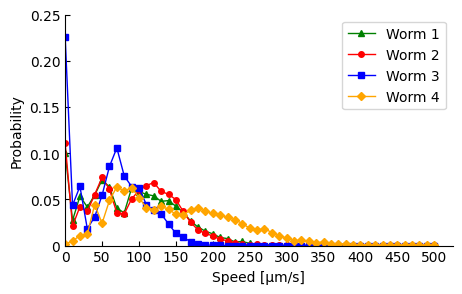

All process is finished


In [6]:
import winsound
import matplotlib.pyplot as plt
import pandas as pd


# 色とマーカーのリストを定義
colors = ['green','red', 'blue', 'orange', 'magenta', 'purple',    'darkorange','cyan','darkgreen',]
markers = ['^', 'o', 's', 'D', 'x', 'v', 'p', '*', '+']

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.figure(figsize=(5, 3))

for h in range(len(folder_paths)):
    folder_paths[h] = folder_paths[h].replace("\\", "/")
    print(folder_paths[h])

    # bright image csv file's path
    file_path = folder_paths[h] + "/" + "log matching 50 fps.csv"

    df = pd.read_csv(file_path, encoding='shift_jis')
    
    if len(df) > 1000:
        df = df.iloc[1000:]  # 最初の1000行を除外

    # velocity 列の範囲ごとのカウント数を計算
    bins = list(range(-5, 510, 10))  # -5から505までの10刻みとそれ以上
    labels = [f'{i+5}' for i in range(-5, 500, 10)]  # ラベルの設定

    df['velocity_bin'] = pd.cut(df['velocity[μm/s]'], bins=bins, labels=labels, right=False)

    # 範囲ごとのカウント数を計算
    counts = df['velocity_bin'].value_counts().sort_index()

    # 全体に対する割合を計算
    total_count = len(df)
    probability = counts / total_count

    # 個体ごとに異なる色とマーカーを使用してプロット
    plt.plot(probability.index, probability.values, lw=1, marker=markers[h % len(markers)], 
             markersize=4, color=colors[h % len(colors)], label=f'Worm {h+1}')

# グラフの設定
plt.ylabel('Probability')#, fontsize=15)
plt.xlabel('Speed [μm/s]')#, fontsize=15)
# plt.title('Speed vs Probability')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.grid(False)

# X軸のラベルをカスタマイズ（0.00を0に変更）
yticks = plt.gca().get_yticks()
ytick_labels = [f'{int(y)}' if y == 0 else f'{y:.2f}' for y in yticks if y >= 0]
plt.yticks(yticks[yticks >= 0], ytick_labels)

# 表示するY軸のラベルを選択して設定
selected_ticks = list(range(0, len(labels), 5))  # 5刻みでラベルを選択
selected_labels = [labels[i] for i in selected_ticks]  # 選択したラベル
plt.xticks(ticks=selected_ticks, labels=selected_labels)

# 凡例を追加
plt.legend()

# グラフを保存
# new_path = folder_paths[0].replace("/ana/", "/figs/")  # 同じ保存先を使用
# plt.savefig(new_path + '/Speed Probability.jpeg', bbox_inches='tight')

# グラフを表示
plt.show()

print("All process is finished")
winsound.Beep(1000, 200)
